In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
Base.metadata.tables

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
from sqlalchemy import and_
end_year=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
percipitation_data = session.query(Measurement.date,Measurement.prcp).filter(
        and_( Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23')).filter(Measurement.prcp != 'None').all()






In [12]:
'''dates = [result[0] for result in percipitation_data]

percp = [result[1] for result in percipitation_data]

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores


# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


'''

'dates = [result[0] for result in percipitation_data]\n\npercp = [result[1] for result in percipitation_data]\n\n# Calculate the date 1 year ago from the last data point in the database\n\n# Perform a query to retrieve the data and precipitation scores\n\n\n# Sort the dataframe by date\n\n# Use Pandas Plotting with Matplotlib to plot the data\n\n\n'

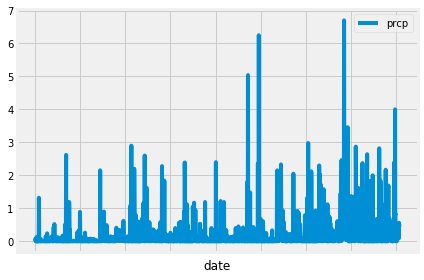

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(percipitation_data)
df.set_index('date', inplace=True)
df.head(10)
df.plot()
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()


,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [15]:
# Design a query to show how many stations are available in this dataset?
station_count=session.query(Station.id).count()
station_count

9

In [16]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
#from sqlalchemy import func
active_stations =session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
#for results in active_stations:
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temperature = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                           filter(Measurement.station == 'USC00519281')
                           
for r in temperature:
    print(r)

(54.0, 85.0, 71.66378066378067)


In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_highest_observations = session.query(Station.name,Measurement.station,func.count(Measurement.tobs)).\
                                     group_by(Measurement.station).\
                                     filter(Measurement.station == Station.station).\
                                     order_by(func.count(Measurement.tobs).desc()).first()
                                     
 
    
temp_obs_lastyear=session.query(Measurement.date,Measurement.tobs).\
                     filter(and_( Measurement.date <= '2017-08-23', Measurement.date >= '2016-08-23')).\
                      filter(Measurement.station == station_highest_observations[1]).all()

for temp_obs in temp_obs_lastyear:
        print(temp_obs)
        
       
        
        

('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09'

In [19]:
histogram_df = pd.DataFrame(temp_obs_lastyear)
histogram_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


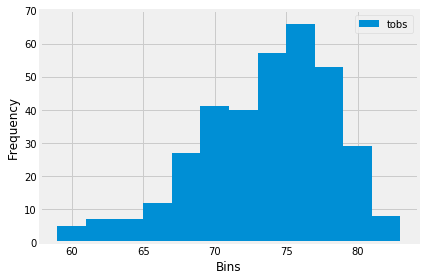

In [20]:

n_bins = 12
x = histogram_df.tobs
plt.hist(x, n_bins,label='tobs')
plt.ylim(0,70)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

![precipitation](Images/station-histogram.png)

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    
    func_prv_year= session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return func_prv_year

trip=(calc_temps('2017-02-28', '2017-03-05'))

trip

[(64.0, 72.02777777777777, 78.0)]

Text(0.5,1,'Trip Avg Temp')

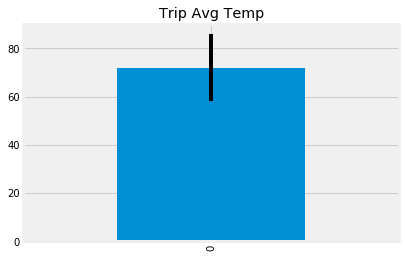

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_avg_temp=pd.DataFrame(trip,columns=['mintemp','avgtemp','maxtemp'])

trip_avg_temp['avgtemp'].plot.bar(yerr=trip_avg_temp['maxtemp']-trip_avg_temp['mintemp'])
plt.title("Trip Avg Temp")

In [24]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#Station.name, Station.latitude, Station.longitude,Station.elevation
#filter(Measurement.station == Station.station).\
def cal_rainfall(start_date, end_date):
    
    results= session.query(Measurement.station,func.sum(Measurement.prcp),Station.name,Station.latitude,Station.longitude,Station.elevation).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date) .\
    filter(Measurement.station == Station.station) .\
             group_by(Measurement.station) .\
            order_by((func.sum(Measurement.prcp)).desc()).all()
    return results

cal_rainfall('2017-02-28', '2017-03-05')


[('USC00519281',
  4.720000000000001,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117', 4.45, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00516128',
  4.07,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00517948', 2.98, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00519397',
  2.7399999999999998,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519523',
  2.32,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  1.1600000000000001,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0)]

## Optional Challenge Assignment

In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
date_list=[]
def daily_normals(date):
    sel = [Measurement.date,func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    


# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
start = dt.date(2011,2,28)
end = dt.date(2011,3,5)
normals = []
normals=[start + dt.timedelta(days=x) for x in range(int((end-start).days))]
#print(dt.date("%m-%d",normals))
res=[]
for d in normals:  
     dates=(d.strftime("%m-%d"))
     res.append(*daily_normals(dates))

# date_list
# # daily_normals(dates)
# result_list=[]        
# for date in date_list:    
#     res=(daily_normals(date))
#     result_list.append(res)
    


In [28]:
results_df=pd.DataFrame(res,columns=['date','tmin','tavg','tmax'])
results_df
#results_df[] = pd.DataFrame(results_df.tolist(), index= results_df.index)

,date,tmin,tavg,tmax
0,2016-02-28,65.0,70.655172,80.0
1,2014-03-01,64.0,70.032787,76.0
2,2015-03-02,61.0,70.366667,78.0
3,2017-03-03,60.0,70.068966,78.0
4,2017-03-04,57.0,69.272727,77.0


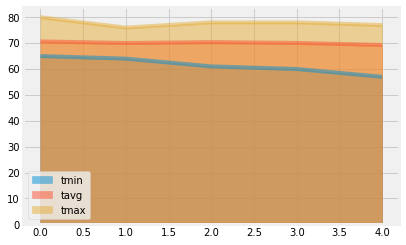

In [49]:

results_df.plot.area(stacked=False)


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
